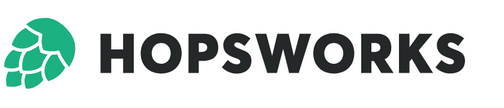

# Batch Predictions

**Note**: you may get an error when installing hopsworks on Colab, and it is safe to ignore it.

## 🗒️ This notebook is divided in 3 main sections:
1. **Read a batch of data, ready for batch inference**
2. **Download & use the model to generate predictions using the inference data**
3. **Save the UI output as a .png graph, and write the predictions to a Feature Group**

In [ ]:
!pip install -U hopsworks --quiet

In [1]:
import hopsworks

project = hopsworks.login()

fs = project.get_feature_store()
mr = project.get_model_registry()

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/23699
Connected. Call `.close()` to terminate connection gracefully.
Connected. Call `.close()` to terminate connection gracefully.


In [2]:
import datetime
start_date = (datetime.datetime.now() - datetime.timedelta(hours=24)) 
end_date = (datetime.datetime.now()) 
print(start_date)
print(end_date)

2023-06-10 21:25:22.657898
2023-06-11 21:25:22.657898


In [3]:
feature_view = fs.get_feature_view("cc_trans_fraud", 1)

feature_view.init_batch_scoring(training_dataset_version=1)

In [4]:
print(feature_view.get_batch_query())

WITH right_fg0 AS (SELECT *
FROM (SELECT `fg2`.`tid` `tid`, `fg2`.`datetime` `datetime`, `fg2`.`cc_num` `join_pk_cc_num`, `fg2`.`datetime` `join_evt_datetime`, `fg0`.`cc_num` `cc_num`, `fg0`.`category` `category`, `fg0`.`amount` `amount`, `fg0`.`age_at_transaction` `age_at_transaction`, `fg0`.`days_until_card_expires` `days_until_card_expires`, `fg0`.`loc_delta_t_minus_1` `loc_delta_t_minus_1`, `fg0`.`time_delta_t_minus_1` `time_delta_t_minus_1`, RANK() OVER (PARTITION BY `fg2`.`cc_num`, `fg2`.`datetime` ORDER BY `fg0`.`datetime` DESC) pit_rank_hopsworks
FROM `rec_featurestore`.`transactions_fraud_label_2` `fg2`
INNER JOIN `rec_featurestore`.`cc_trans_fraud_2` `fg0` ON `fg2`.`cc_num` = `fg0`.`cc_num` AND `fg2`.`datetime` >= `fg0`.`datetime`) NA
WHERE `pit_rank_hopsworks` = 1), right_fg1 AS (SELECT *
FROM (SELECT `fg2`.`tid` `tid`, `fg2`.`datetime` `datetime`, `fg2`.`cc_num` `join_pk_cc_num`, `fg2`.`datetime` `join_evt_datetime`, `fg1`.`trans_volume_mstd` `trans_volume_mstd`, `fg1`.`tra

In [5]:
transactions_df = feature_view.get_batch_data(start_time = start_date, end_time = end_date)
transactions_df

2023-06-11 21:25:51,507 INFO: USE `rec_featurestore`
2023-06-11 21:25:52,495 INFO: WITH right_fg0 AS (SELECT *
FROM (SELECT `fg2`.`tid` `tid`, `fg2`.`datetime` `datetime`, `fg2`.`cc_num` `join_pk_cc_num`, `fg2`.`datetime` `join_evt_datetime`, `fg0`.`cc_num` `cc_num`, `fg0`.`category` `category`, `fg0`.`amount` `amount`, `fg0`.`age_at_transaction` `age_at_transaction`, `fg0`.`days_until_card_expires` `days_until_card_expires`, `fg0`.`loc_delta_t_minus_1` `loc_delta_t_minus_1`, `fg0`.`time_delta_t_minus_1` `time_delta_t_minus_1`, RANK() OVER (PARTITION BY `fg2`.`cc_num`, `fg2`.`datetime` ORDER BY `fg0`.`datetime` DESC) pit_rank_hopsworks
FROM `rec_featurestore`.`transactions_fraud_label_2` `fg2`
INNER JOIN `rec_featurestore`.`cc_trans_fraud_2` `fg0` ON `fg2`.`cc_num` = `fg0`.`cc_num` AND `fg2`.`datetime` >= `fg0`.`datetime`
WHERE `fg2`.`datetime` >= 1686432322657 AND `fg2`.`datetime` <= 1686518722657) NA
WHERE `pit_rank_hopsworks` = 1), right_fg1 AS (SELECT *
FROM (SELECT `fg2`.`tid` `ti

,tid,datetime,cc_num,category,amount,age_at_transaction,days_until_card_expires,loc_delta_t_minus_1,time_delta_t_minus_1,trans_volume_mstd,trans_volume_mavg,trans_freq,loc_delta_mavg
0,0aa270a39724da2223ad47ea7c46ae2b,1686468242000,4000667689382891,4,0.003208,0.226990,0.714653,0.178459,0.000168,0.005874,0.005683,0.005683,0.131021
1,922765379df75c782adcd6cbd313d79b,1686475365000,4000667689382891,2,0.003198,0.226993,0.714613,0.079107,0.000580,0.004675,0.004485,0.004485,0.189085
2,7c373e8f8ea15ca5e721495ccf549b63,1686478646000,4000667689382891,1,0.014136,0.226994,0.714595,0.166627,0.001878,0.018819,0.018631,0.018631,0.226111
3,71866bdd8b8e5d868ae36e5d1bff8263,1686482090000,4000667689382891,2,0.002652,0.226996,0.714575,0.203328,0.000080,0.018387,0.018199,0.018199,0.282910
4,b9ef0edea8eab7402673db01f3a9ad65,1686433576000,4001060543013085,1,0.000406,0.114428,0.419328,0.061723,0.003228,0.005412,0.005222,0.005222,0.093650
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32077,09000cbaeab19df66740bedd3ee87242,1686435280000,4999701412737213,1,0.000952,0.149264,0.079081,0.093019,0.000259,0.005707,0.005516,0.005516,0.222016
32078,1f90418017ed2b3e41afc93f875f7e80,1686455380000,4999701412737213,5,0.000468,0.149272,0.078968,0.049659,0.000260,0.006340,0.006150,0.006150,0.089729
32079,3ef3817221d60d621138f14e0527ef8e,1686469305000,4999701412737213,2,0.000478,0.149277,0.078890,0.079067,0.000093,0.005523,0.005333,0.005333,0.108914
32080,97b1e98a611abb17036f923fc3944df6,1686471214000,4999701412737213,2,0.002738,0.149278,0.078879,0.011744,0.000652,0.004781,0.004590,0.004590,0.081097


In [6]:
features_df = transactions_df.iloc[: , 3:]
features_df

,category,amount,age_at_transaction,days_until_card_expires,loc_delta_t_minus_1,time_delta_t_minus_1,trans_volume_mstd,trans_volume_mavg,trans_freq,loc_delta_mavg
0,4,0.003208,0.226990,0.714653,0.178459,0.000168,0.005874,0.005683,0.005683,0.131021
1,2,0.003198,0.226993,0.714613,0.079107,0.000580,0.004675,0.004485,0.004485,0.189085
2,1,0.014136,0.226994,0.714595,0.166627,0.001878,0.018819,0.018631,0.018631,0.226111
3,2,0.002652,0.226996,0.714575,0.203328,0.000080,0.018387,0.018199,0.018199,0.282910
4,1,0.000406,0.114428,0.419328,0.061723,0.003228,0.005412,0.005222,0.005222,0.093650
...,...,...,...,...,...,...,...,...,...,...
32077,1,0.000952,0.149264,0.079081,0.093019,0.000259,0.005707,0.005516,0.005516,0.222016
32078,5,0.000468,0.149272,0.078968,0.049659,0.000260,0.006340,0.006150,0.006150,0.089729
32079,2,0.000478,0.149277,0.078890,0.079067,0.000093,0.005523,0.005333,0.005333,0.108914
32080,2,0.002738,0.149278,0.078879,0.011744,0.000652,0.004781,0.004590,0.004590,0.081097


In [7]:
import joblib

the_model = mr.get_model("cc_fraud", version=2)
model_dir = the_model.download()

model = joblib.load(model_dir + "/cc_fraud_model.pkl")

## <span style="color:#ff5f27;">  Use the model to score transactions </span>

In [8]:
predictions = model.predict(features_df)

In [9]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [10]:
transactions_df['prediction'] = predictions.tolist()

In [11]:
results_df = transactions_df.copy()[["tid", "cc_num", "datetime", "prediction"]]

In [12]:
results_df.loc[:,'batch_start_date'] = start_date
results_df

,tid,cc_num,datetime,prediction,batch_start_date
0,0aa270a39724da2223ad47ea7c46ae2b,4000667689382891,1686468242000,0,2023-06-10 21:25:22.657898
1,922765379df75c782adcd6cbd313d79b,4000667689382891,1686475365000,0,2023-06-10 21:25:22.657898
2,7c373e8f8ea15ca5e721495ccf549b63,4000667689382891,1686478646000,0,2023-06-10 21:25:22.657898
3,71866bdd8b8e5d868ae36e5d1bff8263,4000667689382891,1686482090000,0,2023-06-10 21:25:22.657898
4,b9ef0edea8eab7402673db01f3a9ad65,4001060543013085,1686433576000,0,2023-06-10 21:25:22.657898
...,...,...,...,...,...
32077,09000cbaeab19df66740bedd3ee87242,4999701412737213,1686435280000,0,2023-06-10 21:25:22.657898
32078,1f90418017ed2b3e41afc93f875f7e80,4999701412737213,1686455380000,0,2023-06-10 21:25:22.657898
32079,3ef3817221d60d621138f14e0527ef8e,4999701412737213,1686469305000,0,2023-06-10 21:25:22.657898
32080,97b1e98a611abb17036f923fc3944df6,4999701412737213,1686471214000,0,2023-06-10 21:25:22.657898


In [13]:
results_fg = fs.get_or_create_feature_group(
    name="cc_fraud_results",
    version=1,
    description="Number of predicted frauds by card",
    primary_key=["cc_num"],
    event_time="datetime"
)
results_fg.insert(results_df)

Uploading Dataframe: 0.00% |          | Rows 0/32082 | Elapsed Time: 00:00 | Remaining Time: ?

Launching offline feature group backfill job...
Backfill Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/23699/jobs/named/cc_fraud_results_1_offline_fg_backfill/executions


(<hsfs.core.job.Job at 0x2719a1f68e0>, None)

In [14]:
results_df.loc[:,'batch_end_date'] = end_date
results_df

,tid,cc_num,datetime,prediction,batch_start_date,batch_end_date
0,0aa270a39724da2223ad47ea7c46ae2b,4000667689382891,1686468242000,0,2023-06-10 21:25:22.657898,2023-06-11 21:25:22.657898
1,922765379df75c782adcd6cbd313d79b,4000667689382891,1686475365000,0,2023-06-10 21:25:22.657898,2023-06-11 21:25:22.657898
2,7c373e8f8ea15ca5e721495ccf549b63,4000667689382891,1686478646000,0,2023-06-10 21:25:22.657898,2023-06-11 21:25:22.657898
3,71866bdd8b8e5d868ae36e5d1bff8263,4000667689382891,1686482090000,0,2023-06-10 21:25:22.657898,2023-06-11 21:25:22.657898
4,b9ef0edea8eab7402673db01f3a9ad65,4001060543013085,1686433576000,0,2023-06-10 21:25:22.657898,2023-06-11 21:25:22.657898
...,...,...,...,...,...,...
32077,09000cbaeab19df66740bedd3ee87242,4999701412737213,1686435280000,0,2023-06-10 21:25:22.657898,2023-06-11 21:25:22.657898
32078,1f90418017ed2b3e41afc93f875f7e80,4999701412737213,1686455380000,0,2023-06-10 21:25:22.657898,2023-06-11 21:25:22.657898
32079,3ef3817221d60d621138f14e0527ef8e,4999701412737213,1686469305000,0,2023-06-10 21:25:22.657898,2023-06-11 21:25:22.657898
32080,97b1e98a611abb17036f923fc3944df6,4999701412737213,1686471214000,0,2023-06-10 21:25:22.657898,2023-06-11 21:25:22.657898


In [15]:
import numpy as np
unique, counts = np.unique(predictions, return_counts=True)

In [16]:
print(np.asarray((unique, counts)).T)

[[    0 32079]
 [    1     3]]


In [17]:
print(counts[1])

3


In [18]:
import pandas as pd
data = {'datetime': [start_date], 'num_predicted_fraud': [counts[1]]}
df = pd.DataFrame.from_dict(data)

### Write the number of predicted credit card frauds to a Feature Group


In [19]:
fraud_fg = fs.get_or_create_feature_group(
    name="predicted_fraud",
    version=1,
    description="Number of predicted frauds by day",
    primary_key=["datetime"],
    event_time="datetime"
)
fraud_fg.insert(df)

Uploading Dataframe: 0.00% |          | Rows 0/1 | Elapsed Time: 00:00 | Remaining Time: ?

Launching offline feature group backfill job...
Backfill Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/23699/jobs/named/predicted_fraud_1_offline_fg_backfill/executions


(<hsfs.core.job.Job at 0x2719abed7c0>, None)

### Create a graph of the numer of suspected fraudulent transactions over time

First, read up all the historical suspected fraudulent transactions 

In [20]:
history_df = fraud_fg.read()

2023-06-11 21:34:40,140 INFO: USE `rec_featurestore`
2023-06-11 21:34:41,015 INFO: SELECT `fg0`.`datetime` `datetime`, `fg0`.`num_predicted_fraud` `num_predicted_fraud`
FROM `rec_featurestore`.`predicted_fraud_1` `fg0`


In [21]:
# Sort the historical fraud predictions by day
history_df = history_df.sort_values(by = ['datetime'])  

In [22]:
history_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   datetime             2 non-null      datetime64[ns]
 1   num_predicted_fraud  2 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 48.0 bytes


In [23]:
history_df['day_of_year'] = history_df['datetime'].dt.dayofyear 

history_df

,datetime,num_predicted_fraud,day_of_year
0,2023-04-09 03:59:13.588,1,99
1,2023-06-10 21:25:22.657,3,161


<Figure size 1500x700 with 0 Axes>

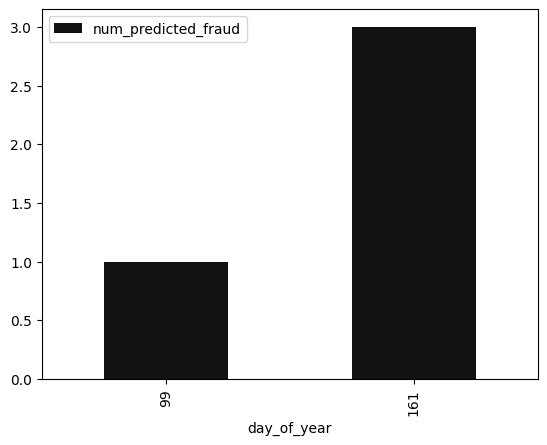

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

color='#111111'
plt.figure(figsize=(15, 7))

history_df.plot(kind='bar', x='day_of_year', y='num_predicted_fraud', color=color)

plt.savefig("fraud_counts.png")
plt.show()

plt.close()
